## 📈 Day 6 - Time Series Analysis & Seasonality Trends

### 🪄 Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

### 🗂️ Step 2: Load the Cleaned Dataset

In [2]:
# Load the cleaned dataset
df = pd.read_csv("../data/superstore_cleaned.csv", parse_dates=["order_date"])

### 🧽 Step 3: Prepare Data for Time Series

In [3]:
# Ensure datetime format and create a new column for monthly grouping
df['order_date'] = pd.to_datetime(df['order_date'])
df['month_year'] = df['order_date'].dt.to_period('M').astype(str)

### 📊 Step 4: Aggregate Monthly Sales and Profit

In [4]:
# Group by month and calculate total sales and profit
monthly_trend = df.groupby("month_year")[["sales", "profit"]].sum().reset_index()

### 📅 Step 5: Visualize Monthly Sales Trend

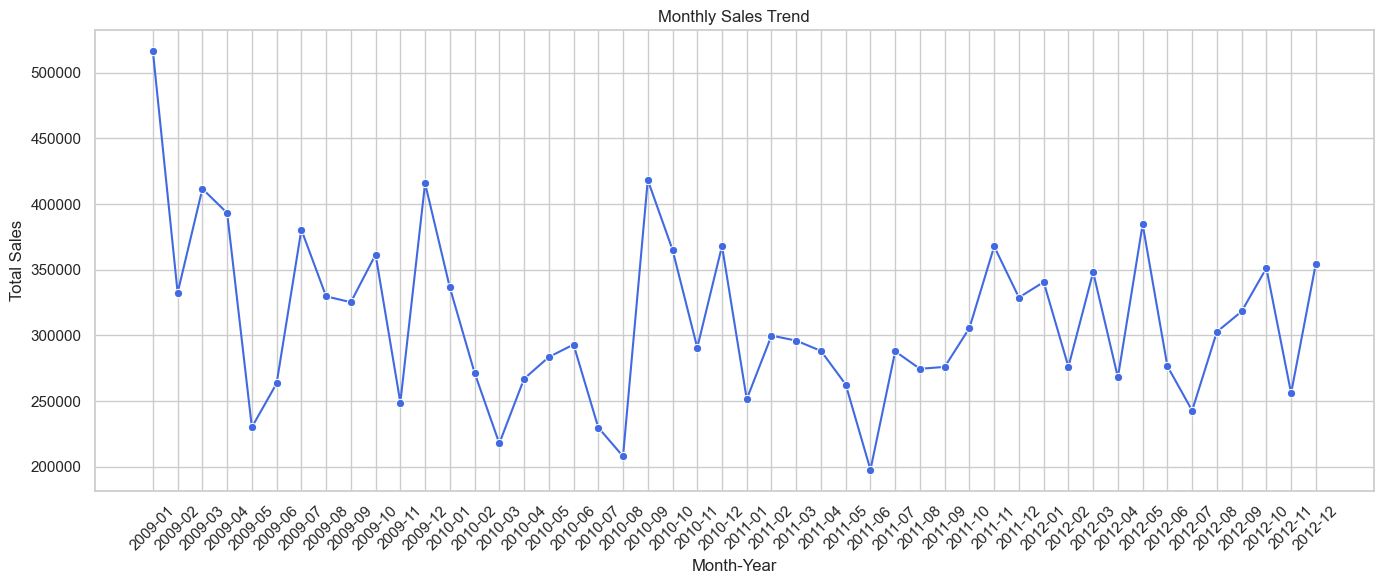

In [5]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x="month_year", y="sales", marker="o", color="royalblue")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

### 💹 Step 6: Visualize Monthly Profit Trend

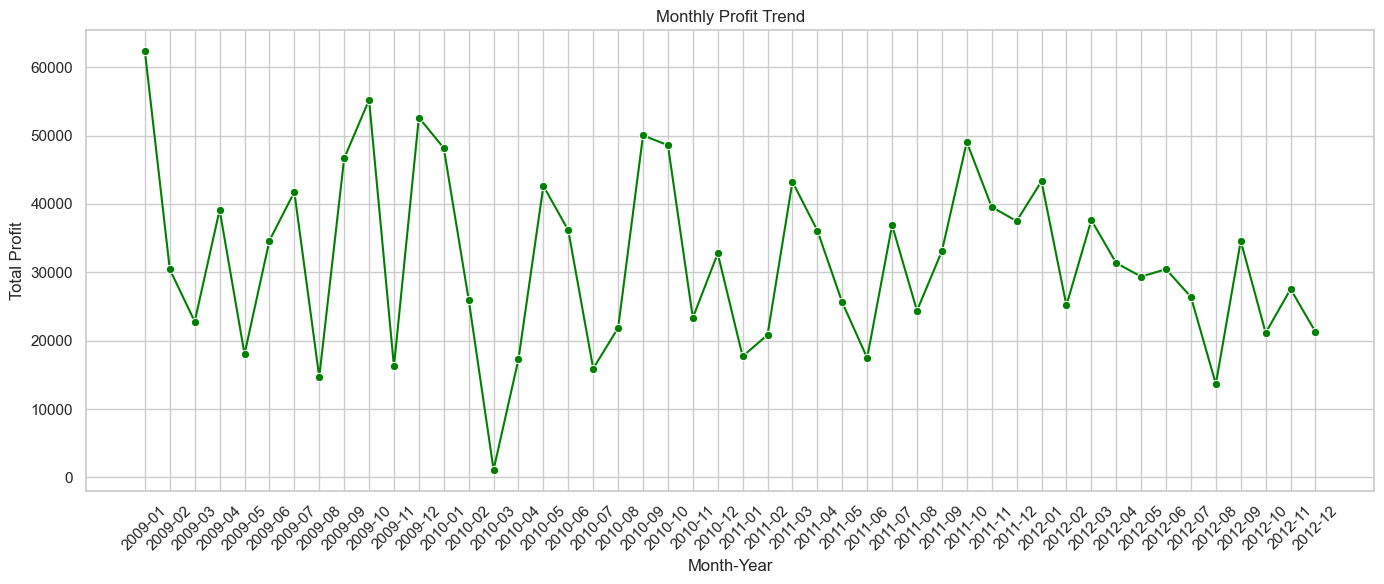

In [6]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x="month_year", y="profit", marker="o", color="green")
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

### 📅 Step 7: Year-wise Sales and Profit Trend Comparison

In [7]:
# Extract year and month for comparison
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Aggregate sales and profit by year and month
yearly_trends = df.groupby(['year', 'month'])[['sales', 'profit']].sum().reset_index()

# Create a month-year string for better x-axis labels
yearly_trends['month_year'] = yearly_trends['year'].astype(str) + '-' + yearly_trends['month'].astype(str).str.zfill(2)

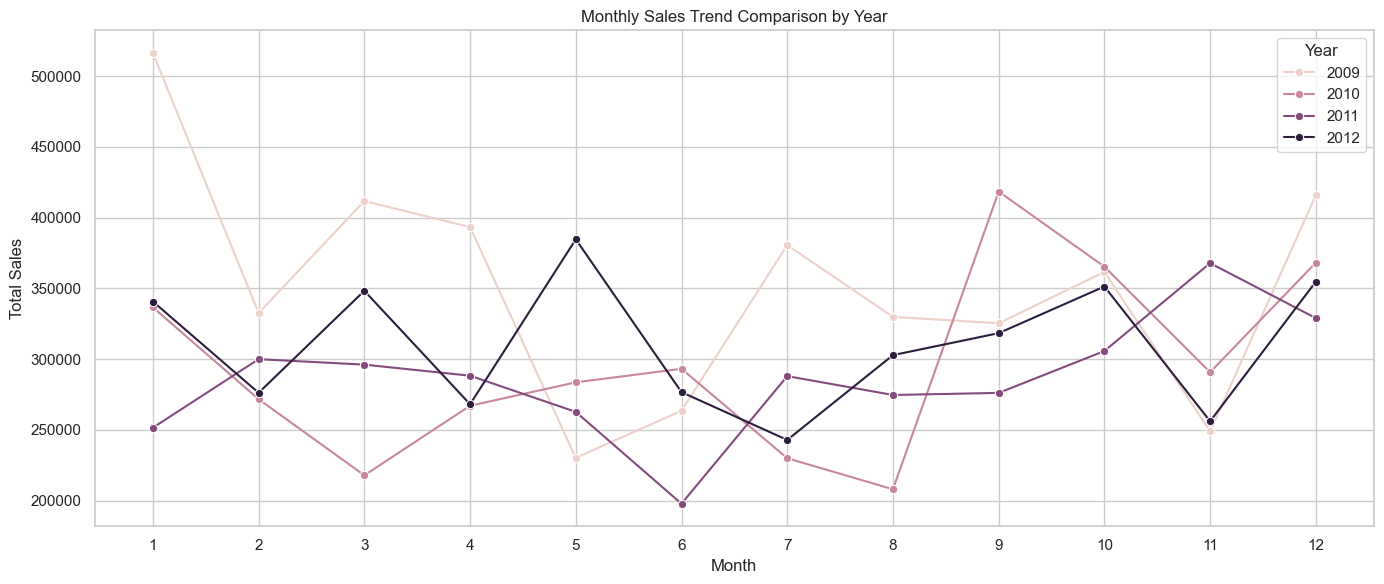

In [8]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_trends, x='month', y='sales', hue='year', marker='o')
plt.title('Monthly Sales Trend Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

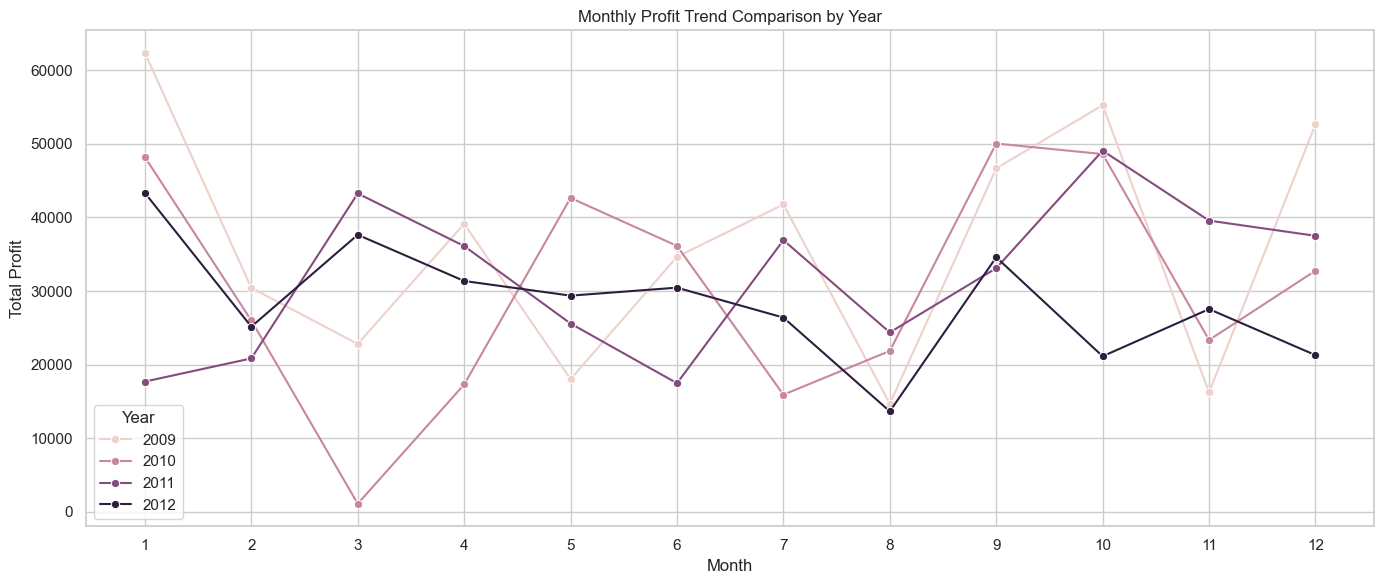

In [9]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_trends, x='month', y='profit', hue='year', marker='o')
plt.title('Monthly Profit Trend Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(ticks=range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### 🌦️ Step 8: Identify Seasonality Patterns in Sales

In [10]:
# Calculate average sales for each month across all years
seasonality = yearly_trends.groupby('month')['sales'].mean().reset_index()

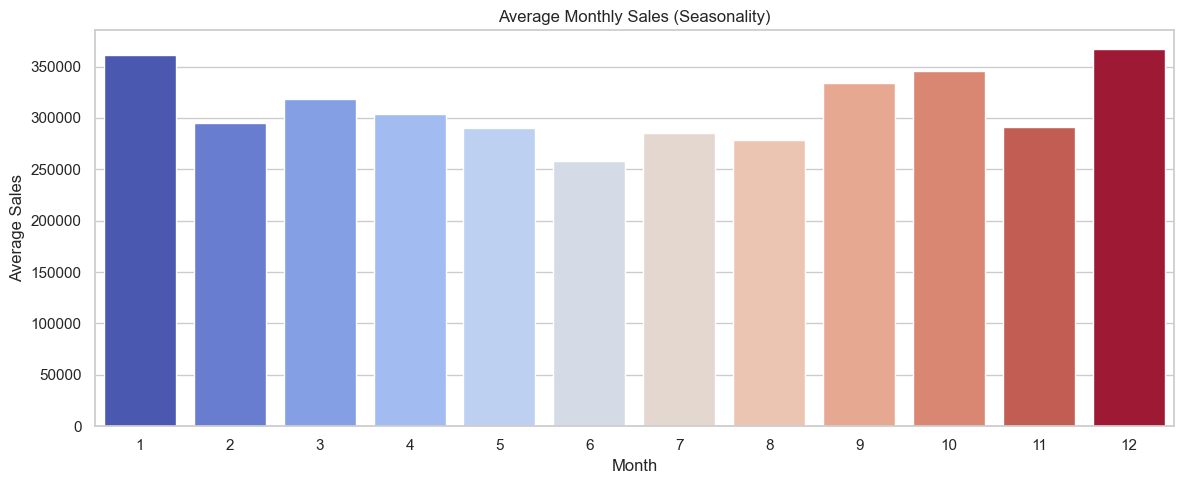

In [11]:
plt.figure(figsize=(12, 5))
sns.barplot(data=seasonality, x='month', y='sales', hue='month', palette='coolwarm', legend=False)
plt.title('Average Monthly Sales (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

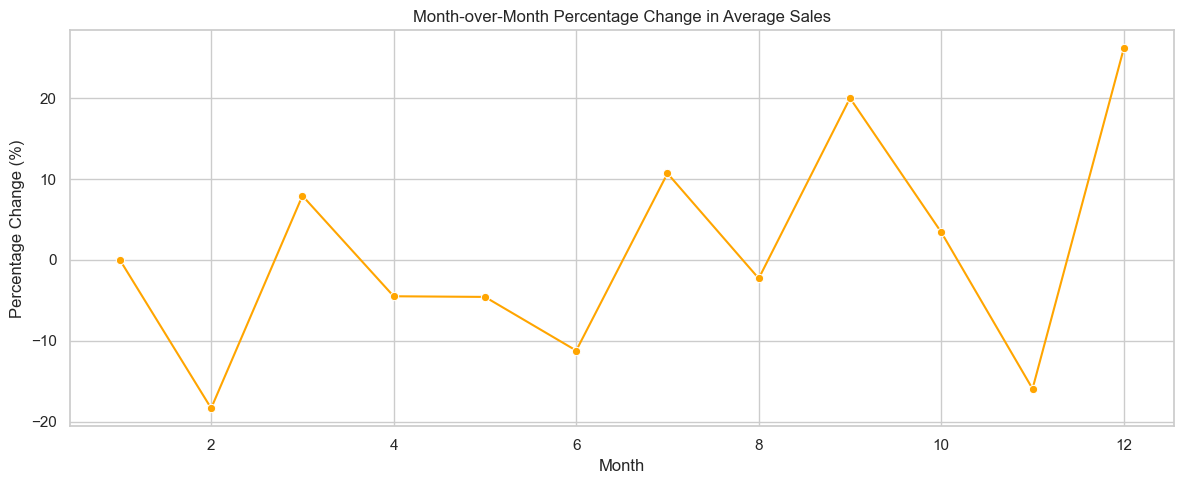

In [12]:
# Optional: Calculate percentage change month-over-month to highlight spikes/dips
seasonality['pct_change'] = seasonality['sales'].pct_change().fillna(0) * 100

plt.figure(figsize=(12, 5))
sns.lineplot(data=seasonality, x='month', y='pct_change', marker='o', color='orange')
plt.title('Month-over-Month Percentage Change in Average Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.tight_layout()
plt.show()

## ✅ Summary of Day 6
- Analyzed sales and profit trends over time
- Grouped data by month and year for time-based analysis
- Visualized monthly and yearly trends in sales and profit
- Identified seasonal patterns and peak business periods

🚀 Ready to move to Day 7: Predictive Modeling & Final Dashboard Integration!